In [18]:
# --- Imports ---
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

In [19]:

# 2) LambdaCDM 6 parameters (Planck 18 + lensing + BAO bestfit) 
fixed_settings = {
                'T_cmb':2.7255,
                'omega_b':0.02238280,
                'omega_cdm':0.1201075,
                'h':0.67810,
                'A_s':2.100549e-09, # amplitude of primodial power spectrum
                'n_s':0.9660499, # scalar spectral index
                'output':'tCl,pCl,lCl', # temperature, polarisation and lensing spectrum 
                'lensing':'yes' # say yes if you want CMB lensing, needs 'lCl'
                }

In [ ]:
#  FUNCTION: Compute TT, TE, EE CMB spectra D_ell
#  ======================================================
def get_Dls(params):
    cosmo = Class()
    cosmo.set(params)
    cosmo.compute()

    cl = cosmo.raw_cl(2500)
    T = cosmo.T_cmb()

    # Extract multipoles starting at ℓ = 2 , as ℓ= 0,1 represent monopole and dipole due to our motion.
    ell = cl['ell'][2:]
    TT  = cl['tt'][2:]
    EE  = cl['ee'][2:]
    TE  = cl['te'][2:]

    # Correct factor for Dℓ
    factor = ell * (ell + 1) / (2 * np.pi) * T**2 * 1e12

    Dl_TT = TT * factor
    Dl_EE = EE * factor
    Dl_TE = TE * factor

    cosmo.struct_cleanup()
    cosmo.empty()

    return ell, Dl_TT, Dl_EE, Dl_TE


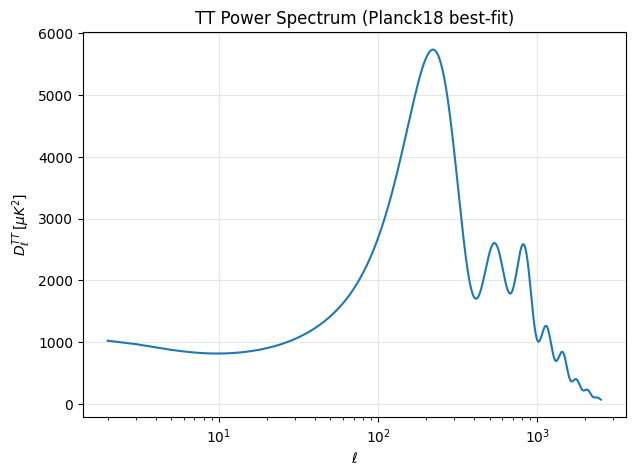

In [22]:
# 1) TT plot

plt.figure(figsize=(7,5))
plt.plot(ell, DlTT, lw=1.5)
plt.xscale("log")
plt.yscale("linear")
plt.xlabel(r"$\ell$")
plt.ylabel(r"$D_\ell^{TT}\, [\mu K^2]$")
plt.title("TT Power Spectrum (Planck18 best-fit)")
plt.grid(True, alpha=0.3)
plt.show()


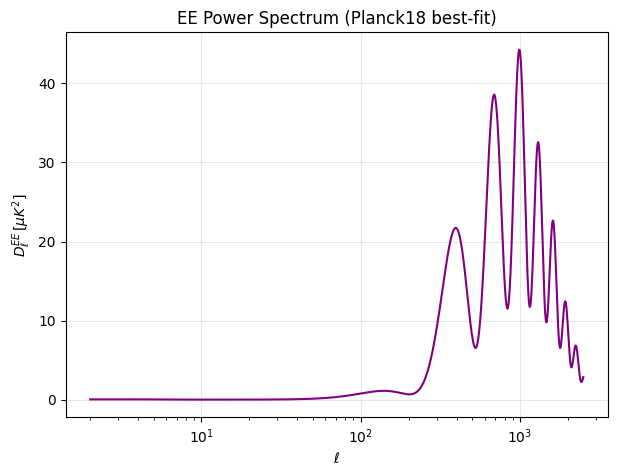

In [ ]:
# 2) EE plot
plt.figure(figsize=(7,5))
plt.plot(ell, DlEE, lw=1.5, color="purple")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel(r"$\ell$")
plt.ylabel(r"$D_\ell^{EE}\, [\mu K^2]$")
plt.title("EE Power Spectrum (Planck18 best-fit)")
plt.grid(True, alpha=0.3)
plt.show()


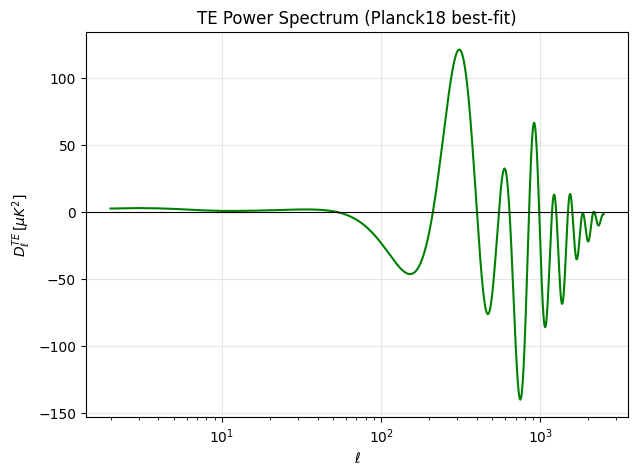

In [23]:
# ============================
# 3) TE plot
# ============================

plt.figure(figsize=(7,5))
plt.plot(ell, DlTE, lw=1.5, color="green")
plt.xscale("log")
plt.yscale("linear")   # TE has negative regions → use linear!
plt.xlabel(r"$\ell$")
plt.ylabel(r"$D_\ell^{TE}\, [\mu K^2]$")
plt.title("TE Power Spectrum (Planck18 best-fit)")
plt.grid(True, alpha=0.3)
plt.axhline(0, color="black", lw=0.8)  # zero-line for TE
plt.show()
